#### Importing Libraries and Loading Data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
pd.options.display.float_format = '{:.2f}'.format

In [35]:
df = pd.read_excel("Call_Volume_Trend_Analysis_Project_9.xlsx")

#### Exploratory Data Analysis

In [36]:
df.head(2)

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.00,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.00,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26


In [37]:
df.shape

(117988, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Agent_Name          83790 non-null   object        
 1   Agent_ID            83790 non-null   float64       
 2   Customer_Phone_No   117988 non-null  object        
 3   Queue_Time(Secs)    117988 non-null  int64         
 4   Date_&_Time         117988 non-null  datetime64[ns]
 5   Time                117988 non-null  int64         
 6   Time_Bucket         117988 non-null  object        
 7   Duration(hh:mm:ss)  117988 non-null  object        
 8   Call_Seconds (s)    117988 non-null  int64         
 9   Call_Status         117988 non-null  object        
 10  Wrapped _By         70111 non-null   object        
 11  Ringing             117988 non-null  object        
 12  IVR _Duration       117988 non-null  object        
dtypes: datetime64[ns](1), float64

In [39]:
df.describe()

,Agent_ID,Queue_Time(Secs),Time,Call_Seconds (s)
count,83790.00,117988.00,117988.00,117988.00
mean,1000033.83,52.17,13.70,139.53
std,18.21,46.15,3.23,158.51
min,1000001.00,0.00,9.00,0.00
25%,1000019.00,8.00,11.00,0.00
50%,1000034.00,40.00,13.00,115.00
75%,1000050.00,103.00,16.00,202.25
max,1000065.00,122.00,21.00,3872.00


In [40]:
df.Call_Status.value_counts()

answered    82452
abandon     34403
transfer     1133
Name: Call_Status, dtype: int64

In [41]:
df.Time_Bucket.value_counts()

11_12    14626
10_11    13313
12_13    12652
13_14    11561
14_15    10561
9_10      9588
15_16     9159
16_17     8788
17_18     8534
18_19     7238
19_20     6463
20_21     5505
Name: Time_Bucket, dtype: int64

#### Analysis & Insights

#### Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket).

In [42]:
pivot_df1 = df.query("Call_Status == 'answered'").pivot_table(index='Time_Bucket', values='Call_Seconds (s)', aggfunc='mean').reset_index()
pivot_df1

,Time_Bucket,Call_Seconds (s)
0,10_11,203.33
1,11_12,199.26
2,12_13,192.89
3,13_14,194.74
4,14_15,193.68
5,15_16,198.89
6,16_17,200.87
7,17_18,200.25
8,18_19,202.55
9,19_20,203.41


In [43]:
time_bucket_list = df['Time_Bucket'].unique()
print(time_bucket_list)

['9_10' '10_11' '11_12' '12_13' '13_14' '14_15' '15_16' '16_17' '17_18'
 '18_19' '19_20' '20_21']


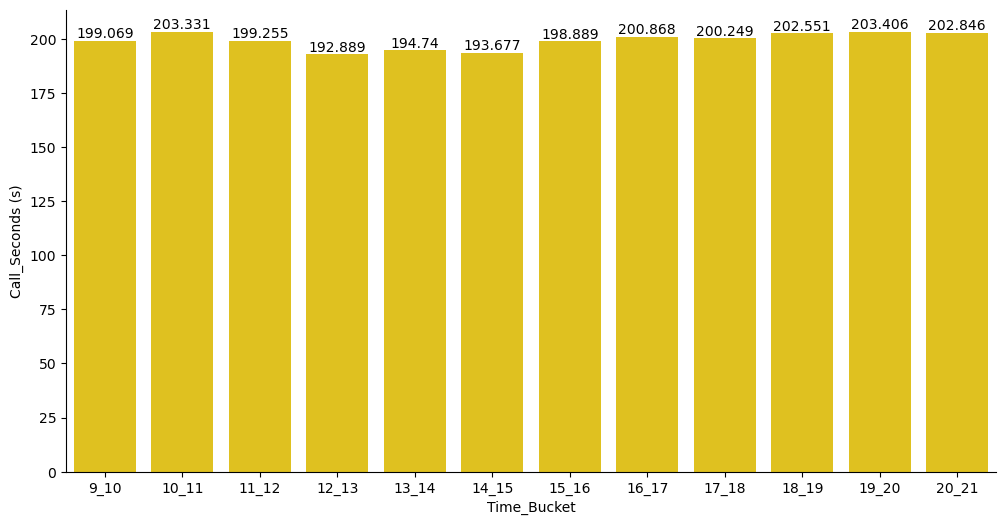

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivot_df1, x='Time_Bucket', y='Call_Seconds (s)', color='gold', ci=None, order=time_bucket_list)

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=f'{pivot_df1["Call_Seconds (s)"][i]:.2f}', label_type='edge')

sns.despine(top=True, right=True)
plt.show()

In [45]:
df['Call_Seconds (s)'][df['Call_Status'] == 'answered'].mean()

198.6227744627177

#### Show the total volume/ number of calls coming in via charts/ graphs [Number of calls v/s Time]. You can select time in a bucket form (i.e. 1-2, 2-3, …..)

In [46]:
pivot_df2 = df.pivot_table(index='Time_Bucket', values='Customer_Phone_No', aggfunc=lambda x: len(x) / len(df) * 100).reset_index()
pivot_df2

,Time_Bucket,Customer_Phone_No
0,10_11,11.28
1,11_12,12.40
2,12_13,10.72
3,13_14,9.80
4,14_15,8.95
5,15_16,7.76
6,16_17,7.45
7,17_18,7.23
8,18_19,6.13
9,19_20,5.48


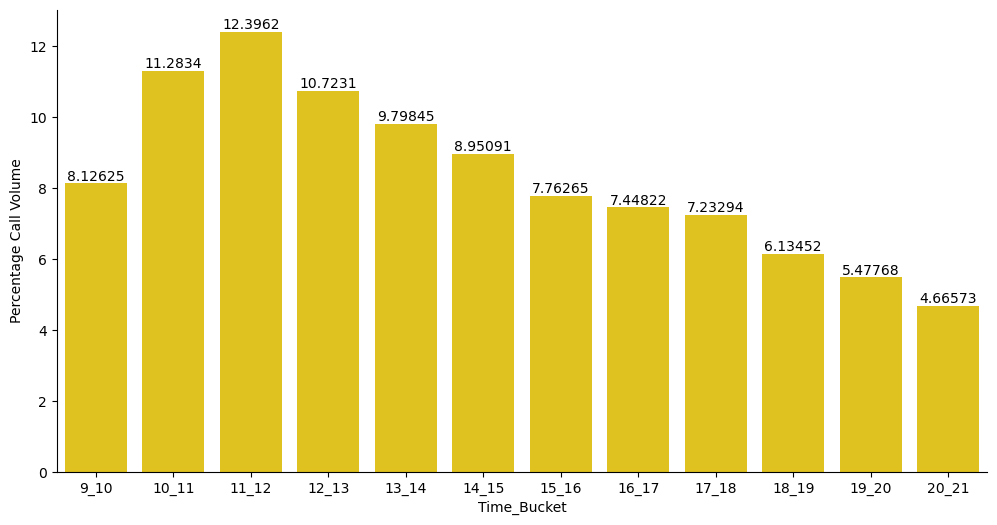

In [47]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=pivot_df2, x='Time_Bucket', y='Customer_Phone_No', color='gold', ci=None, order=time_bucket_list)

plt.ylabel("Percentage Call Volume")
sns.despine(top=True, right=True)

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=f'{pivot_df2["Customer_Phone_No"][i]:.2f}', label_type='edge')

plt.show()

#### As you can see current abandon rate is approximately 30%. Propose a manpower plan required during each time bucket [between 9am to 9pm] to reduce the abandon rate to 10%. (i.e. You have to calculate minimum number of agents required in each time bucket so that at least 90 calls should be answered out of 100.) 

In [48]:
df.Call_Status.value_counts()/len(df)*100     ##Abandon Rate approximately 30%

answered   69.88
abandon    29.16
transfer    0.96
Name: Call_Status, dtype: float64

Assumption: An agent work for 6 days a week; On an average total unplanned leaves per agent is 4 days a month; An agent total working hrs is 9 Hrs out of which 1.5 Hrs goes into lunch and snacks in the office. On average an agent occupied for 60% of his total actual working Hrs (i.e 60% of 7.5 Hrs) on call with customers/ users. Total days in a month is 30 days.
* Agent work hours : 9
* Agent on-floor work hours : 7.5
* Weekly work days : 6
* Unplanned leave days per month : 4
* Days in a month : 30
* Total work days (assumption) : 20
* Actual working hours (60% of 7.5) : 4.5

In [49]:
# Average time for 70% calls answered (in secs)
avg_ans = round(df.loc[df['Call_Status'] == 'answered', 'Call_Seconds (s)'].mean(), 2)
print(avg_ans)

198.62


In [50]:
# Average time required for 90% calls answered
avg_ans_90 = round(avg_ans/70*90,2)
print(avg_ans_90)

255.37


In [51]:
# Total agents working per day at 30% abandonment rate
tot_agnts_70 = round(avg_ans/4.5,0)
print(tot_agnts_70)

44.0


In [52]:
# Total agents required per day for answering 90% calls(reducing abandonment rate to 10%)
tot_agnts_90 = round(avg_ans_90/4.5,0)
print(tot_agnts_90)

57.0


In [53]:
# Minimum number of agents required in each time bucket so that at least 90 calls should be answered out of 100
pivot_df2['Agents Reqd'] = (pivot_df2['Customer_Phone_No'] * .57).round(0)
pivot_df2 = pivot_df2.rename(columns={'Customer_Phone_No': 'Call_Volume_Pct'})
pivot_df2

,Time_Bucket,Call_Volume_Pct,Agents Reqd
0,10_11,11.28,6.00
1,11_12,12.40,7.00
2,12_13,10.72,6.00
3,13_14,9.80,6.00
4,14_15,8.95,5.00
5,15_16,7.76,4.00
6,16_17,7.45,4.00
7,17_18,7.23,4.00
8,18_19,6.13,3.00
9,19_20,5.48,3.00


#### Let’s say customers also call this ABC insurance company in night but didn’t get answer as there are no agents to answer, this creates a bad customer experience for this Insurance company. Suppose every 100 calls that customer made during 9 Am to 9 Pm, customer also made 30 calls in night between interval [9 Pm to 9 Am] and distribution of those 30 calls are as follows:


![abc](ABC_project_asset.png)

#### Now propose a manpower plan required during each time bucket in a day. Maximum Abandon rate assumption would be same 10%.

In [54]:
df['Day_Month'] = df['Date_&_Time'].dt.strftime('%d/%m')
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration,Day_Month
0,Executives 42,1000042.00,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16,01/01
1,Executives 4,1000004.00,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26,01/01
2,Executives 65,1000065.00,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16,01/01
3,Executives 55,1000055.00,96104XXXXX,1,2022-01-01 09:02:51,9,9_10,00:01:31,91,answered,Agent,YES,00:00:25,01/01
4,Executives 21,1000021.00,82001XXXXX,0,2022-01-01 09:02:55,9,9_10,00:02:45,165,answered,Agent,YES,00:00:23,01/01


In [55]:
df['Day_Month'].unique()

array(['01/01', '02/01', '03/01', '04/01', '05/01', '06/01', '07/01',
       '08/01', '09/01', '10/01', '11/01', '12/01', '13/01', '14/01',
       '15/01', '16/01', '17/01', '18/01', '19/01', '20/01', '21/01',
       '22/01', '23/01'], dtype=object)

In [56]:
new_df = df.pivot_table(index='Day_Month', values='Call_Status', aggfunc='count').reset_index()
new_df

,Day_Month,Call_Status
0,01/01,4644
1,02/01,3351
2,03/01,4789
3,04/01,5113
4,05/01,4790
5,06/01,4951
6,07/01,4948
7,08/01,4672
8,09/01,3652
9,10/01,4983


In [57]:
# Average calls daily (9AM - 9PM)
avg_daily = round(new_df['Call_Status'].mean(),0)
print(avg_daily)

5130.0


In [58]:
# Average call daily for night (9PM -9AM) 
# Every 100 calls that customer made during 9 Am to 9 Pm, customer also made 30 calls in night
avg_night = .3*avg_daily
print(avg_night)

1539.0


In [59]:
# Additional hours required for night
addnl_hrs_night = avg_night*avg_ans_90/3600
print(addnl_hrs_night)

109.170675


In [60]:
# Additional agents required for night
addnl_agnts_night = round(addnl_hrs_night/4.5,0)
print(addnl_agnts_night)

24.0


In [61]:
data = {'Time_Bucket_Night': ['21-22', '22-23', '23-00', '00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09'],
        'Call_Distribution': [3, 3, 2, 2, 1, 1, 1, 1, 3, 4, 4, 5]}

df_night = pd.DataFrame(data)
df_night

,Time_Bucket_Night,Call_Distribution
0,21-22,3
1,22-23,3
2,23-00,2
3,00-01,2
4,01-02,1
5,02-03,1
6,03-04,1
7,04-05,1
8,05-06,3
9,06-07,4


In [62]:
# Percentage Distribution for calls at night
df_night['Pct_Call_Distribution'] = round(df_night['Call_Distribution']/sum(df_night['Call_Distribution'])*100,0)

In [63]:
df_night

,Time_Bucket_Night,Call_Distribution,Pct_Call_Distribution
0,21-22,3,10.00
1,22-23,3,10.00
2,23-00,2,7.00
3,00-01,2,7.00
4,01-02,1,3.00
5,02-03,1,3.00
6,03-04,1,3.00
7,04-05,1,3.00
8,05-06,3,10.00
9,06-07,4,13.00


In [64]:
# Agent required for each time bucket for night
df_night['Agents_Reqd'] = round(df_night['Pct_Call_Distribution']/100*24,0)
df_night

,Time_Bucket_Night,Call_Distribution,Pct_Call_Distribution,Agents_Reqd
0,21-22,3,10.00,2.00
1,22-23,3,10.00,2.00
2,23-00,2,7.00,2.00
3,00-01,2,7.00,2.00
4,01-02,1,3.00,1.00
5,02-03,1,3.00,1.00
6,03-04,1,3.00,1.00
7,04-05,1,3.00,1.00
8,05-06,3,10.00,2.00
9,06-07,4,13.00,3.00
